In [3]:
import os
import glob
import random
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

# Set the path to your dataset directory
dataset_dir = 'freiburg_groceries_dataset/images/'

# Initialize empty lists to store image data and labels
image_data = []
labels = []

# Iterate through each category (folder) in the dataset
categories = os.listdir(dataset_dir)
for category in categories:
    category_dir = os.path.join(dataset_dir, category)

    # Iterate through image files in each category
    image_files = glob.glob(os.path.join(category_dir, '*.png'))
    for image_file in image_files:
        # Load and preprocess the image (you may need to resize or preprocess further)
        # Example using Pillow (PIL):
        image = Image.open(image_file)#.resize((desired_width, desired_height))
        image = np.array(image)

        # Append the image data to the list
        image_data.append(image)

        # Append the label (category) to the labels list
        labels.append(category)

# Split the data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    image_data, labels, test_size=0.2, random_state=42)

# Convert lists to NumPy arrays
trainX = np.array(train_data)
testX = np.array(test_data)
trainY = np.array(train_labels)
testY = np.array(test_labels)


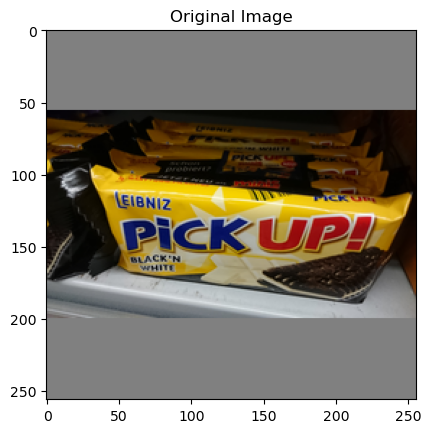

In [8]:
import cv2
from matplotlib import pyplot as plt



plt.imshow(trainX[1])
plt.title('Original Image')
plt.show()


In [ ]:
# reshape Train Set, so that it is n x 784, instead of n x 28 x 28
# nsamples, nx, ny = trainX.shape
# trainX_2d = trainX.reshape((nsamples,nx*ny))

In [ ]:
# perform PCA on the training set, first fit and then transform
# so that the set has the shape: n x 10 (components) 
from sklearn.decomposition import PCA
pca = PCA(n_components=160)
X_r = pca.fit(trainX).transform(trainX)

In [ ]:
# Load SKLearn libraries, neccessary for next steps
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Create a Scaler that will normalize the Data, Create LogisticRegression Model and use a Pipeline to stitch them together
scaler = StandardScaler()
lr = LogisticRegression(max_iter=10000,n_jobs=5, class_weight='balanced', solver='sag')
model = Pipeline([('standardize', scaler),
                  ('log_reg', lr)])
model.fit(X_r, trainY)

In [ ]:
# reshape Test Set, so that it is n x 784, instead of n x 28 x 28
nsamples, nx, ny = testX.shape
testX_2d = testX.reshape((nsamples,nx*ny))

In [ ]:
# perform PCA on the test set, transform it according to other set
X_t = pca.transform(testX_2d)

In [12]:
# Predict the Labels for the new test data, compare them to the known values 
# And calculate how accurate the prediction is
pred = model.predict(X_t);
train_accuracy = accuracy_score(testY, pred)*100
print('Train accuracy is: '+str(train_accuracy)+'%')

ValueError: Found array with dim 4. PCA expected <= 2.